In [1]:
import lhsmdu
import dynesty
import numpy as np
import george
from george import kernels
import schwimmbad
import dynesty.plotting as dyplot
from dynesty import utils as dyfunc
import time
import matplotlib.pyplot as plt

In [2]:
#x=np.array(lhsmdu.sample(3,120)*10)
#np.save("x.npy",x)

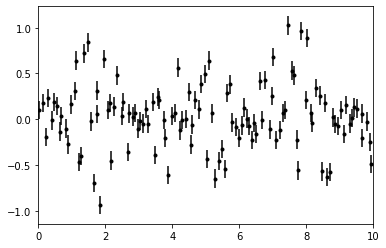

In [3]:
x=np.load("x.npy")
yerr=0.1*np.ones_like(x[0])
np.random.seed(1234)
y=np.sin(x[0])*np.sin(x[1]/4)* np.sin(x[2]*2) + yerr*np.random.randn(len(x[0]))
plt.errorbar(x[0],y,yerr=yerr,fmt='.k',capsize=0)
plt.xlim(0,10)
plt.show()

In [4]:
kernel=np.var(y) * kernels.ExpSquaredKernel(1**2,ndim=3,axes=0)\
        * kernels.ExpSquaredKernel(4**2,ndim=3,axes=1)\
        * kernels.ExpSquaredKernel(0.5**2,ndim=3,axes=2)

gp = george.GP(kernel)
gp.compute(np.transpose(x), yerr)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

Initial ln-likelihood: -22.34


In [5]:
from scipy.optimize import minimize

def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
#print(result)

gp.set_parameter_vector(result.x)
print("Final ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

print(result.x)
print(np.sqrt(np.exp(result.x)))

Final ln-likelihood: -20.29
[-3.15461978 -0.05897709  3.65413837 -1.19316516]
[0.20652994 0.970942   6.21564304 0.55069036]


In [6]:
kernel=np.var(y) * kernels.ExpSquaredKernel(1**2,ndim=3,axes=0)\
        * kernels.ExpSquaredKernel(4**2,ndim=3,axes=1)\
        * kernels.ExpSquaredKernel(0.5**2,ndim=3,axes=2)
gp = george.GP(kernel)
gp.compute(np.transpose(x), yerr)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

Initial ln-likelihood: -22.34


In [7]:
ndim=4
def loglike(p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(y)
    except:
        return - 1e14
def ptform(u): #[-1.4,4] [0,7] [-2.8,3]
    return [u[0]*15 -5, u[1]*5.4-1.4 , u[2]*7 , u[3]*5.8-2.8]

In [8]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim, nlive=1000, pool= schwimmbad.MultiPool())

iter: 9245 | +1000 | bound: 12 | nc: 1 | ncall: 52452 | eff(%): 19.532 | loglstar:   -inf < -20.347 <    inf | logz: -29.595 +/-  0.153 | dlogz:  0.001 >  1.009                                      

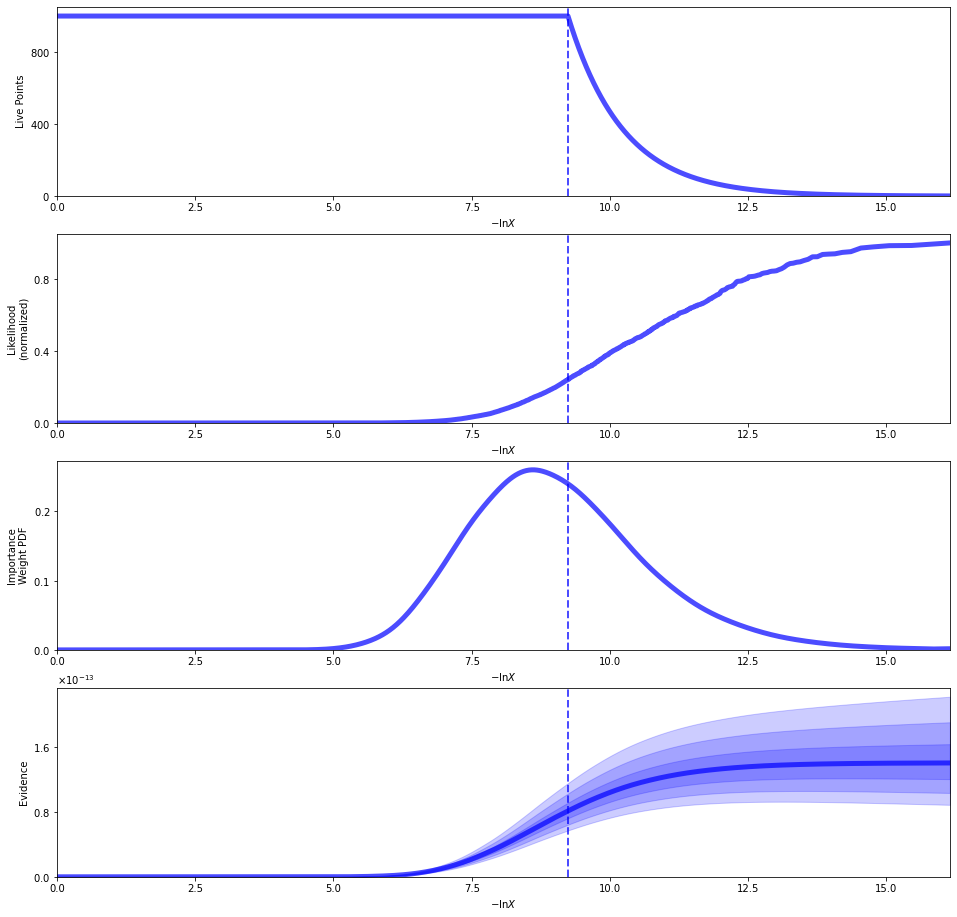

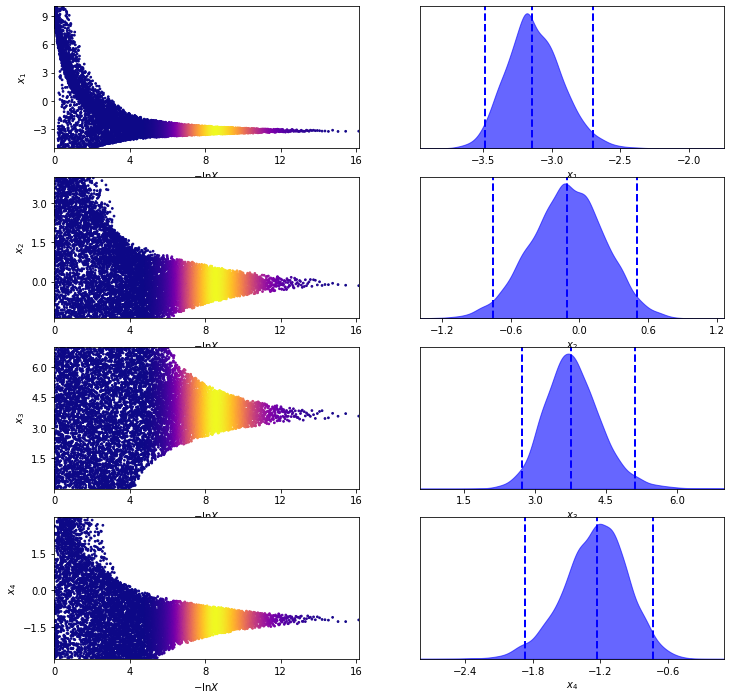

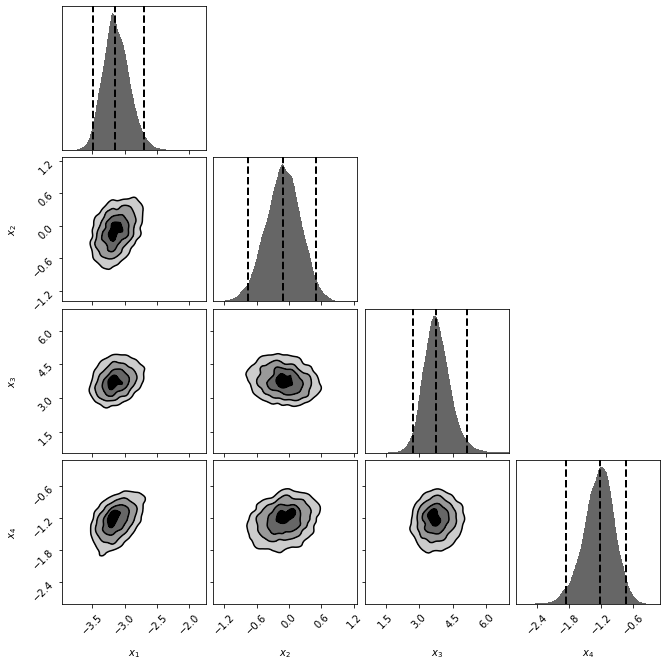

In [9]:
sampler.run_nested()
results = sampler.results
rfig, raxes = dyplot.runplot(results)
tfig, taxes = dyplot.traceplot(results)
cfig, caxes = dyplot.cornerplot(results)

In [1]:
samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)
for i in range(3):
    print(np.quantile(new_samples[:,1+i],[0.5]))

NameError: name 'results' is not defined

In [10]:
# 0/1 
kernel=np.var(y) * kernels.ExpSquaredKernel(4**2,ndim=2,axes=0)\
        * kernels.ExpSquaredKernel(4**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(np.transpose(x[0:2]), yerr)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

ndim=3
def loglike(p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(y)
    except:
        return - 1e14
def ptform(u): #[-10,0] [-10,7]
    return [u[0]*15 -5, u[1]*10-10 , u[2]*17-10]

sampler0 = dynesty.NestedSampler(loglike, ptform, ndim, nlive=1000, pool= schwimmbad.MultiPool())

Initial ln-likelihood: -526.20


iter: 5408 | +1000 | bound: 4 | nc: 1 | ncall: 40427 | eff(%): 15.851 | loglstar:   -inf < -44.772 <    inf | logz: -50.145 +/-  0.102 | dlogz:  0.001 >  1.009                                       

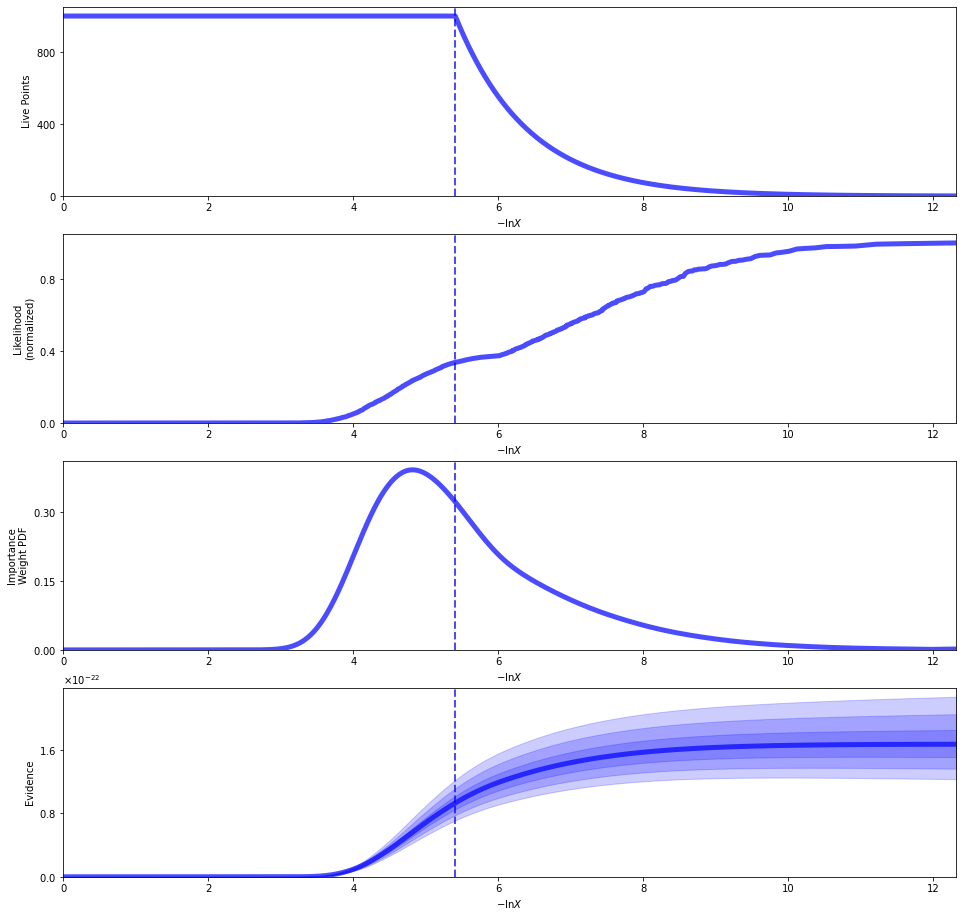

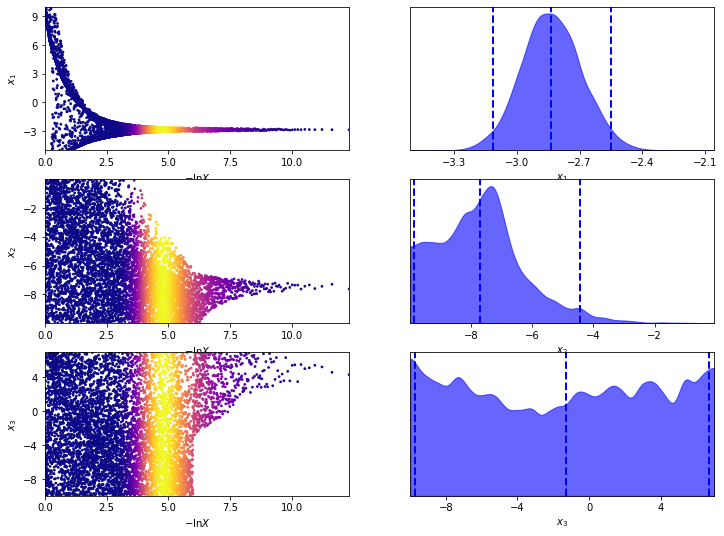

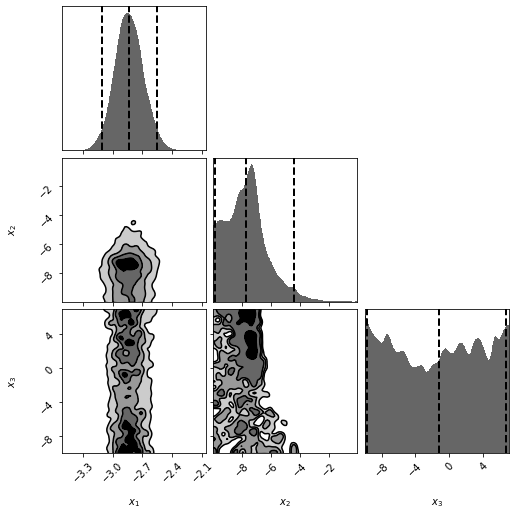

In [11]:
sampler0.run_nested()
results0 = sampler0.results
rfig, raxes = dyplot.runplot(results0)
tfig, taxes = dyplot.traceplot(results0)
cfig, caxes = dyplot.cornerplot(results0)

In [2]:
samples, weights = results0.samples, np.exp(results0.logwt - results0.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)
for i in range(2):
    print(np.quantile(new_samples[:,1+i],[0.5]))

NameError: name 'results0' is not defined

In [12]:
# 1/2
kernel=np.var(y) * kernels.ExpSquaredKernel(4**2,ndim=2,axes=0)\
        * kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(np.transpose(x[1:]), yerr)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

ndim=3
def loglike(p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(y)
    except:
        return - 1e14
def ptform(u): #[-10,7] [-16,0]
    return [u[0]*15 -5, u[1]*17-10 , u[2]*16-16]

sampler1 = dynesty.NestedSampler(loglike, ptform, ndim, nlive=1000, pool= schwimmbad.MultiPool())

Initial ln-likelihood: -295.40


In [13]:
sampler1.run_nested()
results1 = sampler1.results

iter: 7673 | +1000 | bound: 11 | nc: 1 | ncall: 51237 | eff(%): 16.927 | loglstar:   -inf < -40.721 <    inf | logz: -48.430 +/-  0.162 | dlogz:  0.001 >  1.009                                      

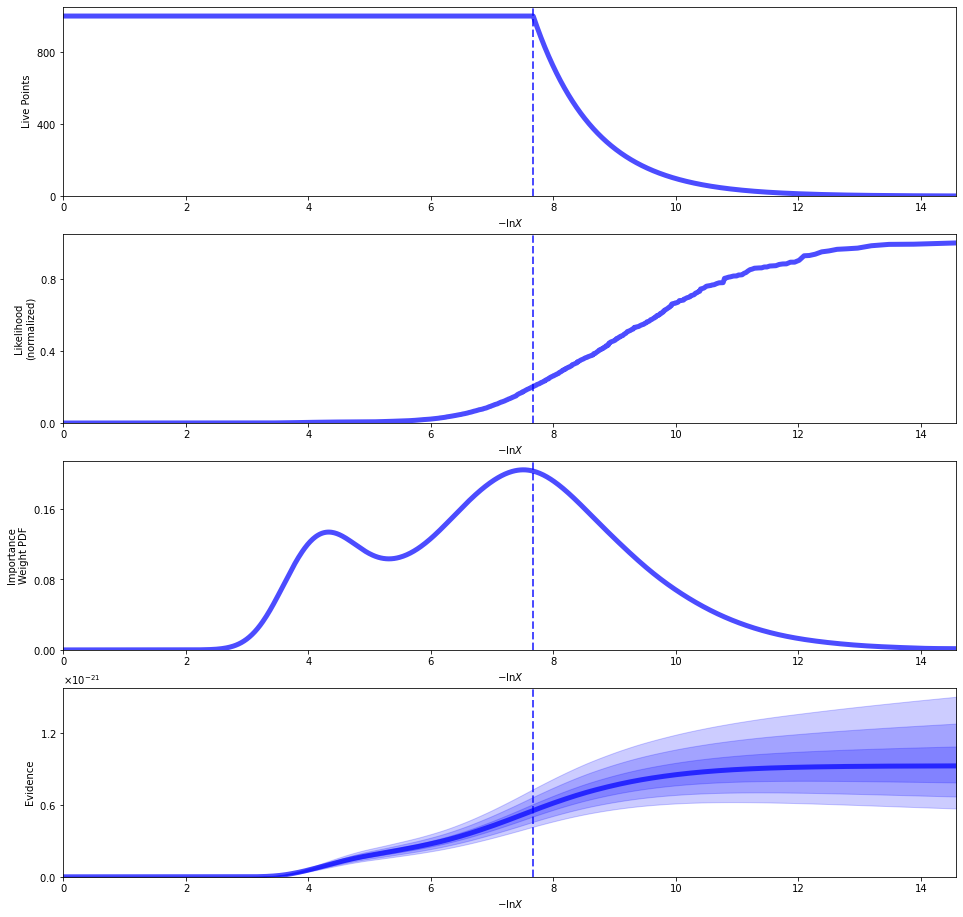

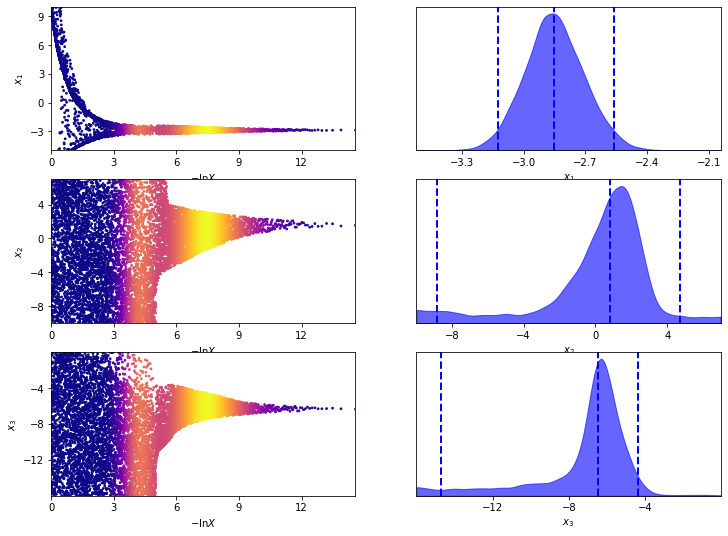

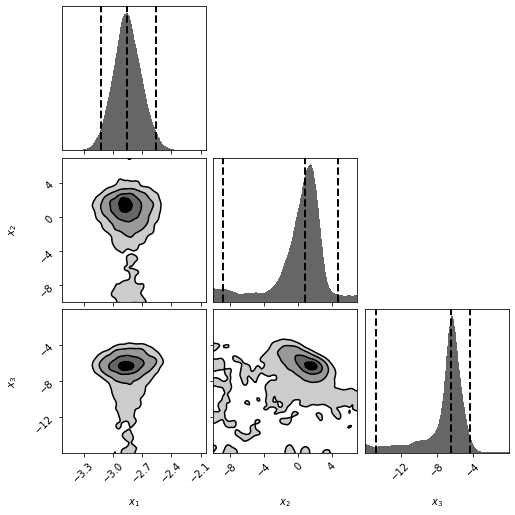

In [14]:
rfig, raxes = dyplot.runplot(results1)
tfig, taxes = dyplot.traceplot(results1)
cfig, caxes = dyplot.cornerplot(results1)

In [3]:
samples, weights = results1.samples, np.exp(results1.logwt - results1.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)
for i in range(2):
    print(np.quantile(new_samples[:,1+i],[0.5]))

NameError: name 'results1' is not defined

In [16]:
# 0/2
kernel=np.var(y) * kernels.ExpSquaredKernel(1**2,ndim=2,axes=0)\
        * kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(np.transpose([x[0],x[2]]), yerr)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

ndim=3
def loglike(p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(y)
    except:
        return - 1e14
def ptform(u): # [-4,4] [-4,4]
    return [u[0]*15 -5, u[1]*8-4 , u[2]*8-4 ]

sampler2 = dynesty.NestedSampler(loglike, ptform, ndim, nlive=1000, pool= schwimmbad.MultiPool())

Initial ln-likelihood: -31.69


In [17]:
sampler2.run_nested()
results2 = sampler2.results

iter: 8641 | +1000 | bound: 11 | nc: 1 | ncall: 52310 | eff(%): 18.431 | loglstar:   -inf < -28.358 <    inf | logz: -36.914 +/-  0.138 | dlogz:  0.001 >  1.009                                      

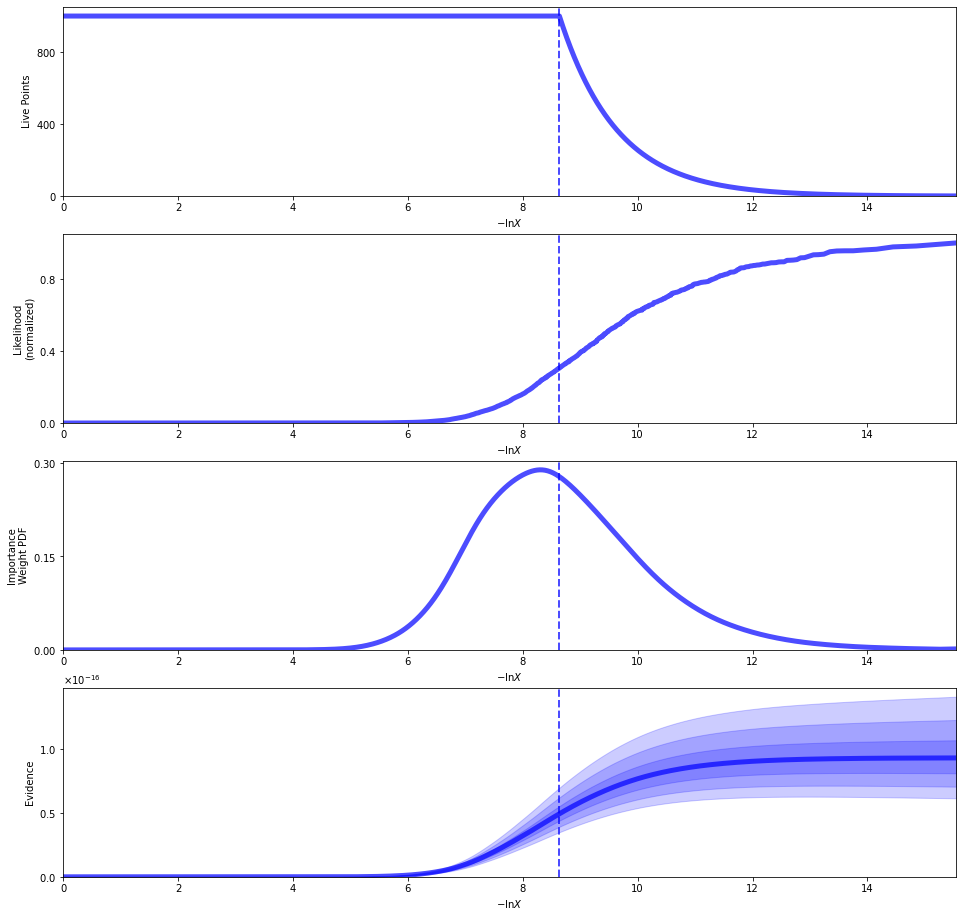

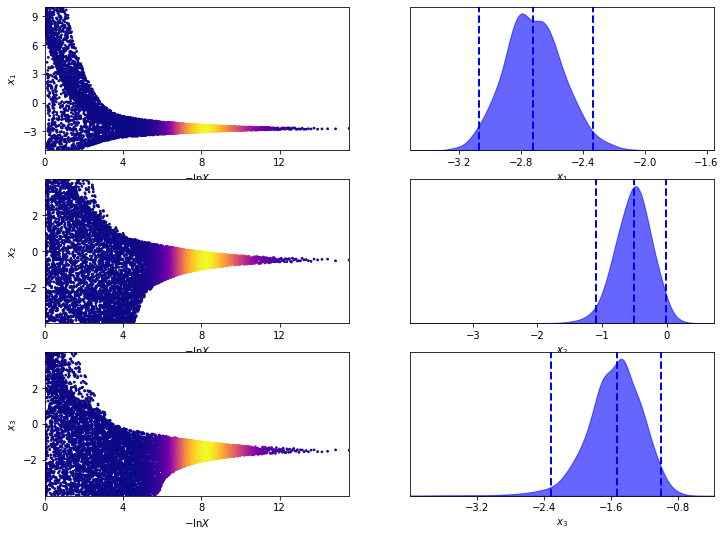

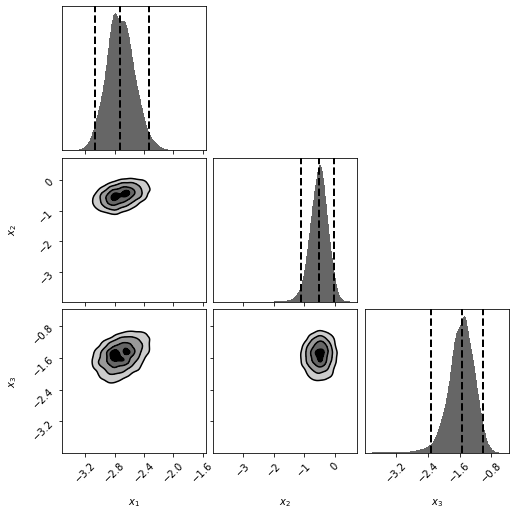

In [18]:
rfig, raxes = dyplot.runplot(results2)
tfig, taxes = dyplot.traceplot(results2)
cfig, caxes = dyplot.cornerplot(results2)

In [4]:
samples, weights = results2.samples, np.exp(results2.logwt - results2.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)
for i in range(2):
    print(np.quantile(new_samples[:,1+i],[0.5]))

NameError: name 'results2' is not defined